## Customer default payments in Taiwan - Decision Trees and Ensemble Models

This is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Objectives

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [49]:
!pip install sklearn_features

  Obtaining dependency information for sklearn_features from https://files.pythonhosted.org/packages/90/0b/ce2ecfb115f80192ae549aa24e786b68961edd9d79fe2454bbc07f324819/sklearn_features-0.0.2-py3-none-any.whl.metadata


In [235]:
#required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [238]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")
dataset.columns = dataset.iloc[0]
dataset.drop(['ID'], axis=1, inplace=True)

In the following, you can take a look into the dataset.

In [241]:
dataset = dataset.iloc[1:].reset_index(drop=True)
dataset.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [243]:
print(dataset.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)


In [245]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

#### Step 1
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [248]:
# Convert all columns to integers
dataset = dataset.astype(int)

In [250]:
# Define features and target
X = dataset.drop(columns=['default payment next month'])
y = dataset['default payment next month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 23)
(6000, 23)
(6000,)


In [252]:
# set variable lists
num_var = ['LIMIT_BAL','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 
            'PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
            'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2',
            'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cat_var = ['SEX', 'EDUCATION', 'MARRIAGE']

In [254]:
# Numerical Pipeline: Standardizes numerical features
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical Pipeline: One-hot encodes categorical features
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_var),
    ('cat', cat_pipeline, cat_var)
])

In [256]:
pip_train_X = preprocessor.fit_transform(X_train)
pip_test_X = preprocessor.fit_transform(X_test)
pip_train_y = y_train.copy() # ['default payment next month']

print(pip_train_X.shape)
print(pip_train_y.shape)

(24000, 32)
(24000,)


In [258]:
X_test.shape

(6000, 23)

In [260]:
# Decision Tree Classifier
from time import time
tree_clf = DecisionTreeClassifier(random_state=42)
start = time()
tree_clf.fit(pip_train_X, pip_train_y)
print("Decision Tree Classifier took %.2f seconds"
      % ((time() - start)))
y_pred = tree_clf.predict(preprocessor.fit_transform(X_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nBest Decision Tree Confusion Matrix:\n", cm)

print("Training accuracy:", tree_clf.score(pip_train_X, pip_train_y))
print("Testing accuracy:", accuracy_score(y_test, y_pred),'\n')

# Tuned Decision Tree (pruned)
print('Try different hyper-parameters (at least two) and discuss the result')
dt_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=4, random_state=42)
start = time()
dt_tuned.fit(pip_train_X, pip_train_y)
print("Tuned Decision Tree Classifier took %.2f seconds"
      % ((time() - start)))
y_pred_tuned = dt_tuned.predict(pip_test_X)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nTuned Decision Tree Confusion Matrix:\n", cm_tuned)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))

Decision Tree Classifier took 2.25 seconds

Best Decision Tree Confusion Matrix:
 [[3689  998]
 [ 739  574]]
Training accuracy: 0.99525
Testing accuracy: 0.7105 

Try different hyper-parameters (at least two) and discuss the result
Tuned Decision Tree Classifier took 0.60 seconds

Tuned Decision Tree Confusion Matrix:
 [[4422  265]
 [ 823  490]]
Tuned Accuracy: 0.8186666666666667


The base decision tree likely overfits (high training accuracy but lower test accuracy) whiles the pruned tree (max_depth=5, min_samples_split=20, and min_samples_leaf=5) shows better generalization with a better accuracy and an improved confusion matrix balance.

#### Step 2

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [264]:
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42)
start = time()
random_search.fit(pip_train_X, pip_train_y)
print("RandomizedSearchCV took %.2f seconds" % ((time() - start)),'\n')
y_pred_rs = random_search.best_estimator_.predict(pip_test_X)
cm_best = confusion_matrix(y_test, y_pred_rs)
print("\nBest Decision Tree from RandomizedSearchCV Confusion Matrix:\n", cm_best)

print("Best Parameters:", random_search.best_params_)
print("Training accuracy after RandomizedSearchCV:", random_search.score(pip_train_X, pip_train_y))
print("Accuracy after RandomizedSearchCV:", accuracy_score(y_test, y_pred_rs))

RandomizedSearchCV took 44.31 seconds 


Best Decision Tree from RandomizedSearchCV Confusion Matrix:
 [[4421  266]
 [ 823  490]]
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}
Training accuracy after RandomizedSearchCV: 0.825125
Accuracy after RandomizedSearchCV: 0.8185


For this particular case, the manual tuning of hyperparameter performed better than RandomizedSearchCV with no over fitting.

#### Step 3

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [268]:
from sklearn.ensemble import VotingClassifier

Random_Forest = RandomForestClassifier(n_estimators=100, random_state=42)
AdaBoost = AdaBoostClassifier(n_estimators=50, random_state=42)
Extra_Trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
Gradient_Boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('rf', Random_Forest), ('ada', AdaBoost), ('extra', Extra_Trees), ('gb', Gradient_Boosting) ],
    voting='hard')

voting_clf.fit(pip_train_X, pip_train_y)

from sklearn.metrics import accuracy_score

for clf in (Random_Forest, AdaBoost, Extra_Trees, Gradient_Boosting):
    clf.fit(pip_train_X, pip_train_y)
    y_pred = clf.predict(pip_test_X);
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred));

C:\Users\frank\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RandomForestClassifier 0.8141666666666667


C:\Users\frank\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier 0.8175
ExtraTreesClassifier 0.8046666666666666
GradientBoostingClassifier 0.8186666666666667


Get the Learning Curves for Random Forest and AdaBoost

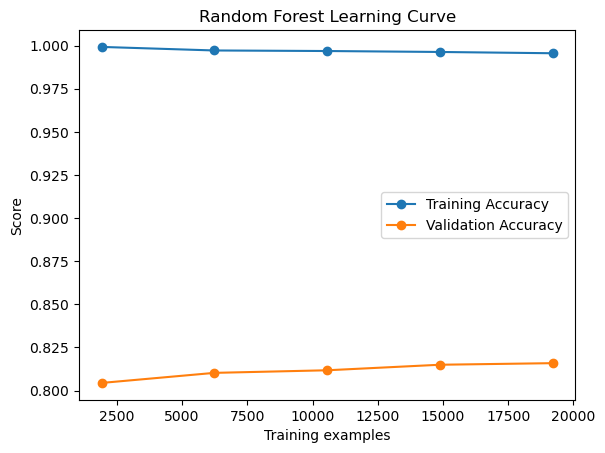

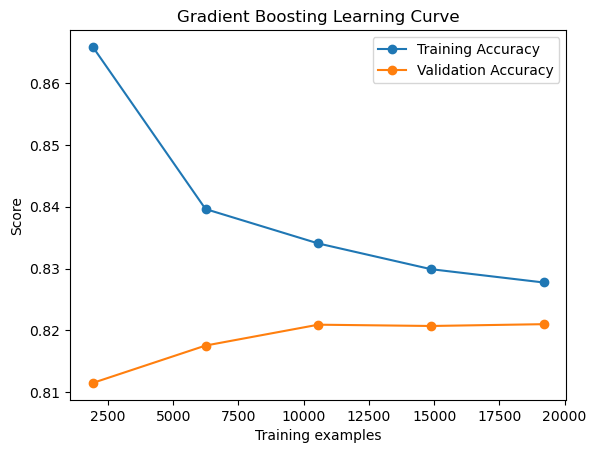

In [273]:
# Get the Learning Curves for Random Forest and AdaBoost
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy'
    )
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training Accuracy")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Validation Accuracy")
    plt.legend()
    plt.show()

plot_learning_curve(Random_Forest, "Random Forest Learning Curve", pip_train_X, pip_train_y)
plot_learning_curve(Gradient_Boosting, "Gradient Boosting Learning Curve", pip_train_X, pip_train_y)

#### Step 4

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

##### Discussion
* Hyperparameter Impact: Changing hyperparameters like max depth, min samples split, and min samples leaf affected model performance by improving model accuracy. A deeper tree captures more patterns but can overfit, while a shallower tree generalizes better. Hyperparameter tuning via RandomizedSearchCV improved accuracy and reduced overfitting.

* Model Performance: Random Forest and Gradient Boosting outperform single trees due to aggregation of predictions. Gradient Boosting often leads due to sequential error correction.

* Strengths/Weaknesses:

  Decision Trees: Interpretable but prone to overfitting.

  Random Forest: Robust to noise, handles high dimensionality, and reduce overfitting by averaging multiple trees.

  AdaBoost: Performed slightly worse because it is sensitive to noisy data and outliers.

  
  Boosting Methods: High accuracy because it builds models sequentially, correcting previous errors and leading to higher predictive accuracy but sensitive to noisy data.